In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import mlxtend

from sklearn.model_selection import train_test_split
from sklearn import svm  
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
ds = "https://raw.githubusercontent.com/simsekergun/ENEE691/main/week06/regression_data.csv"
df = pd.read_csv(ds,header=None)
df.shape

(1047, 10)

In [4]:
# Displaying a sample of 5 rows
df.sample(5)

,0,1,2,3,4,5,6,7,8,9
760,1.000,0.983,0.8915,0.80842,1.3330,0.10000,1.4385,1.3330,0.10000,1
901,1.000,0.983,0.8915,0.80842,1.3330,0.10000,1.4404,1.3330,0.10000,1
788,0.660,0.041,0.7920,1.66230,2.7464,0.91224,5.3504,2.7464,0.91224,0
584,1.000,0.022,0.4890,0.70959,7.7990,0.40750,0.1000,7.7990,0.40750,0
72,0.861,0.629,0.7295,1.72220,4.7866,1.06750,4.1864,4.7866,1.06750,0


In [5]:
# Changing the two classes to 1 (functioning) and -1 (malfunctioning). 
# This step is not a requirement! 
# We do this to be consistent with the notation introduced in the lecture.
df.iloc[:,9] = df.iloc[:,9].apply(lambda x: 1 if x==1 else -1)

In [6]:
# Displaying a sample of 5 rows of 'df'
df.sample(5)

,0,1,2,3,4,5,6,7,8,9
462,1.000,0.121,0.9140,2.10000,0.1000,0.70959,0.1000,0.1000,0.70959,-1
568,1.000,0.280,1.0000,1.70420,7.7990,0.10000,0.1000,7.7990,0.10000,1
64,0.315,0.961,0.7065,1.48920,7.6944,0.11703,3.0717,7.6944,0.11703,-1
835,1.000,0.983,0.8915,0.80842,1.3330,0.10000,1.4385,1.3330,0.10000,1
547,0.172,0.608,0.6945,2.10000,7.2038,0.10000,1.5771,7.2038,0.10000,-1


In [7]:
# Finding the size of each class
print('The number of functioning chips =', len(df[df.iloc[:,9]==1]), '\n')
print('The number of mulfunctioning chips =', len(df[df.iloc[:,9]==-1]), '\n')

The number of functioning chips = 377 

The number of mulfunctioning chips = 670 



In [8]:
X = df[df.columns[0:-1]].values      # Defining the features as numpy array
y = df[df.columns[9]].values         # Defining the target as numpy array

# Splitting the dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5) 

In [9]:
# Instantiating the SVM classifier with linear kernel
# We have allocated a small budget for (C=0.01) for margin violations

linear_svc = svm.SVC(kernel='linear', gamma='auto', C=0.1)  

linear_svc.fit(X_train, y_train)    # Fitting the training data to the classifier

SVC(C=0.1, gamma='auto', kernel='linear')

In [10]:
y_pred = linear_svc.predict(X_test)   # Calculate the predictions of the model for the test subset

In [11]:
# Calculating the accuracy score of the test model
score = accuracy_score(y_test, y_pred)

print('Test accuracy score of the model is ', round(score, 5))

Test accuracy score of the model is  0.74046


In [12]:
nsample = 51
Cs = np.logspace(-2,3,51)
scores = np.zeros(nsample)

for ii in range(nsample):
    linear_svc = svm.SVC(kernel='linear', gamma='auto', C=Cs[ii])  
    linear_svc.fit(X_train, y_train)    # Fitting the training data to the classifier
    y_pred = linear_svc.predict(X_test)   # Calculate the predictions of the model for the test subset
    scores[ii] = accuracy_score(y_test, y_pred)

Text(0.5, 1.0, 'Lin-Lin Scale')

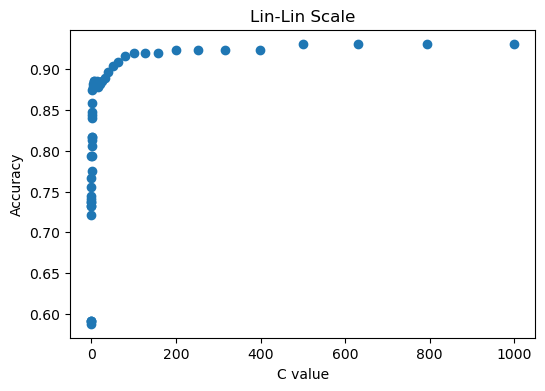

In [13]:
plt.figure(figsize=(6, 4))
plt.scatter(Cs,scores)    
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('Lin-Lin Scale')

Text(0.5, 1.0, 'Log-Lin Scale')

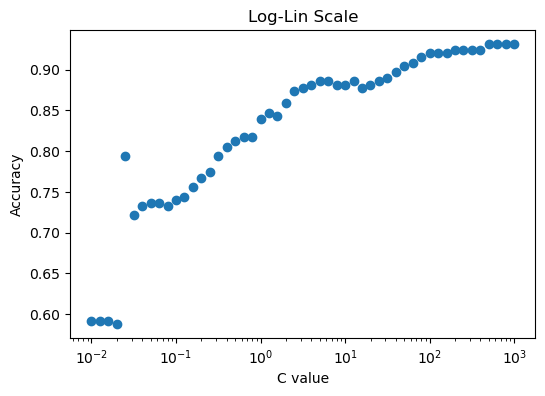

In [14]:
plt.figure(figsize=(6, 4))
plt.xscale("log")
plt.scatter(Cs,scores)    
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('Log-Lin Scale')

In [15]:
linear_svc = svm.SVC(kernel='linear', gamma='auto', C=1000)  
linear_svc.fit(X_train, y_train)    # Fitting the training data to the classifier
y_pred = linear_svc.predict(X_test)   # Calculate the predictions of the model for the test subset
score = accuracy_score(y_test, y_pred)
print('Test accuracy score of the model is ', round(score, 5))

Test accuracy score of the model is  0.9313


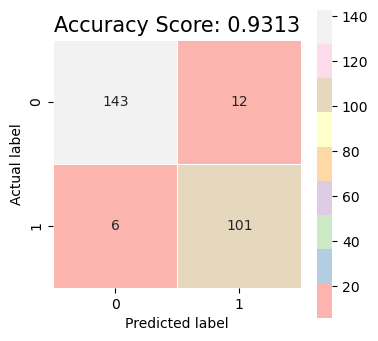

In [16]:
# Computing the confusion matrix
svc_c_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(svc_c_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

In [17]:
# Generating the classification report for the test subset

print('Test Classification Report: \n\n', classification_report(y_test, y_pred))

Test Classification Report: 

               precision    recall  f1-score   support

          -1       0.96      0.92      0.94       155
           1       0.89      0.94      0.92       107

    accuracy                           0.93       262
   macro avg       0.93      0.93      0.93       262
weighted avg       0.93      0.93      0.93       262



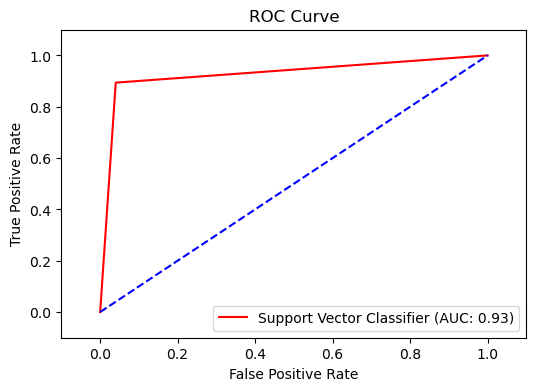

In [24]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='red', label='Support Vector Classifier (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [19]:
def svm_clf(X_tr, X_ts, y_tr, y_ts, ker, C, gamma='auto', r=0, deg=1):
    clf = svm.SVC(kernel=ker, gamma=gamma, C=C, coef0=r, degree=deg)
    clf.fit(X_tr, y_tr)              # Fit the train data
    y_tr_pred = clf.predict(X_tr)    # Predict the target for train data
    y_ts_pred = clf.predict(X_ts)    # Predict the target for test data
    tr_score = accuracy_score(y_tr, y_tr_pred)  # Compute train accuracy
    ts_score = accuracy_score(y_ts, y_ts_pred)  # Compute test accuracy
    tr_report = classification_report(y_tr, y_tr_pred)  # Generate classification report for train data
    ts_report = classification_report(y_ts, y_ts_pred)  # Generate classification report for test data
    print('Train Classification Report: \n\n', tr_report,'\n\n')
    print('Test Classification Report: \n\n', ts_report)
    
    svc_c_matrix = confusion_matrix(y_ts, y_ts_pred)

    plt.figure(figsize=(4,4))
    sns.heatmap(svc_c_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(round(ts_score, 4))
    plt.title(all_sample_title, size = 15);
    plt.show()    
    return 

Train Classification Report: 

               precision    recall  f1-score   support

          -1       0.96      0.90      0.93       515
           1       0.83      0.93      0.88       270

    accuracy                           0.91       785
   macro avg       0.89      0.92      0.90       785
weighted avg       0.92      0.91      0.91       785
 


Test Classification Report: 

               precision    recall  f1-score   support

          -1       0.95      0.91      0.93       155
           1       0.88      0.93      0.90       107

    accuracy                           0.92       262
   macro avg       0.91      0.92      0.92       262
weighted avg       0.92      0.92      0.92       262



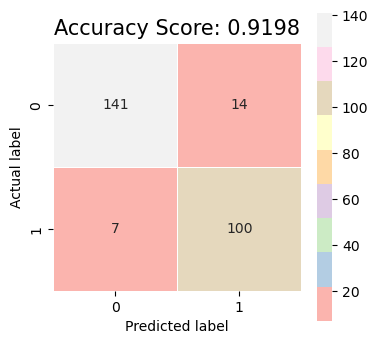

In [20]:
# Apply linear SVM with very low budget for margin violation

svm_clf(X_train, X_test, y_train, y_test, ker='linear', C=100)

Train Classification Report: 

               precision    recall  f1-score   support

          -1       0.98      0.94      0.96       515
           1       0.89      0.97      0.93       270

    accuracy                           0.95       785
   macro avg       0.94      0.95      0.94       785
weighted avg       0.95      0.95      0.95       785
 


Test Classification Report: 

               precision    recall  f1-score   support

          -1       0.95      0.92      0.94       155
           1       0.89      0.93      0.91       107

    accuracy                           0.93       262
   macro avg       0.92      0.93      0.93       262
weighted avg       0.93      0.93      0.93       262



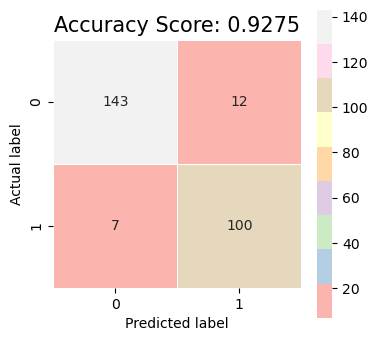

In [21]:
# Apply radial SVM with a relatively high budget for margin violation 
svm_clf(X_train, X_test, y_train, y_test, ker='rbf', C=100)

Train Classification Report: 

               precision    recall  f1-score   support

          -1       0.99      0.99      0.99       515
           1       0.98      0.99      0.98       270

    accuracy                           0.99       785
   macro avg       0.99      0.99      0.99       785
weighted avg       0.99      0.99      0.99       785
 


Test Classification Report: 

               precision    recall  f1-score   support

          -1       0.99      0.96      0.97       155
           1       0.95      0.98      0.96       107

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262



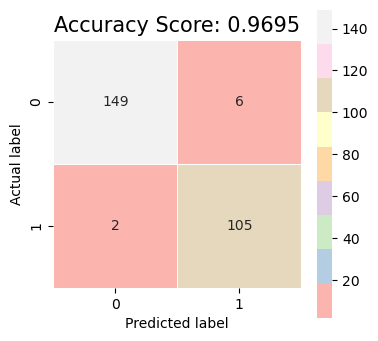

In [22]:
# Apply polynomial SVM (with degree 3 and r=1) with very low budget for margin violation
svm_clf(X_train, X_test, y_train, y_test, ker='poly', C=100, r=1, deg=3)